In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('./Data/Data_processed/Processed_data.csv', sep=';', encoding='latin1')

# Elbow Method

Using the elbow method and silhoutte score to try to find the optimal number of clusters.

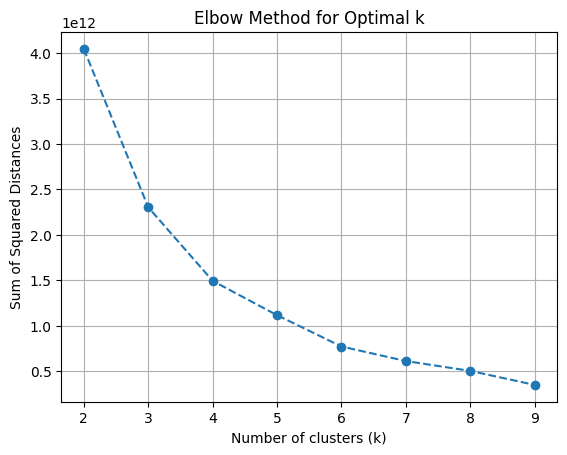

In [7]:
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 10), sse, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.xticks(np.arange(2, 10))
plt.grid(True)
plt.show()

# Silhouette Score

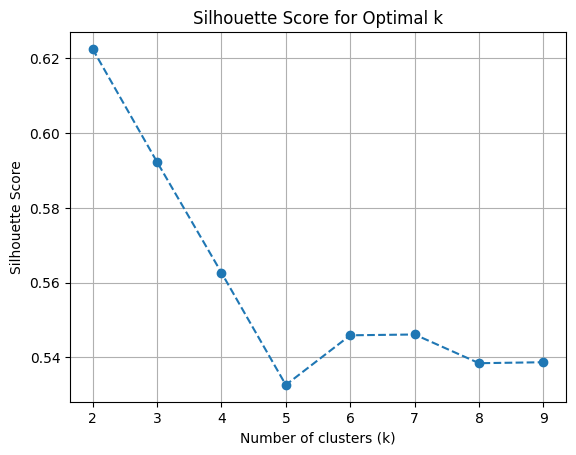

In [12]:
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(np.arange(2, 10))
plt.grid(True)
plt.show()

Looking at both it is not easy to see which value would work best so im starting out with k = 4 since that is the point where it looks like the elbow method plot start to levle off.

In [14]:
k = 4
kmeans = KMeans(n_clusters=k,  init="random", n_init=1, algorithm="lloyd", max_iter=1, random_state=0)

kmeans.fit(data)

KMeans(init='random', max_iter=1, n_clusters=4, n_init=1, random_state=0)

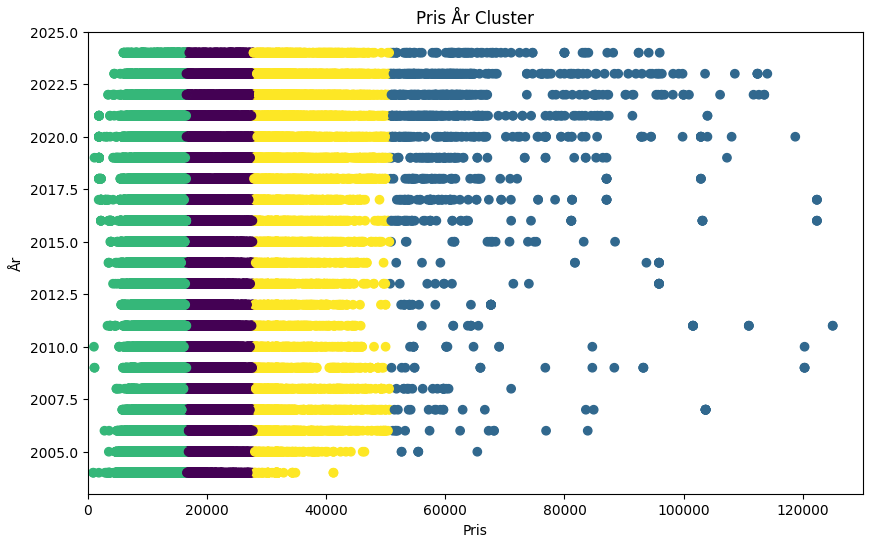

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Pris'], data['År'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Pris')
plt.ylabel('År')
plt.title('Pris År Cluster')
plt.axis([0, 130000, 2003, 2025])
plt.show()

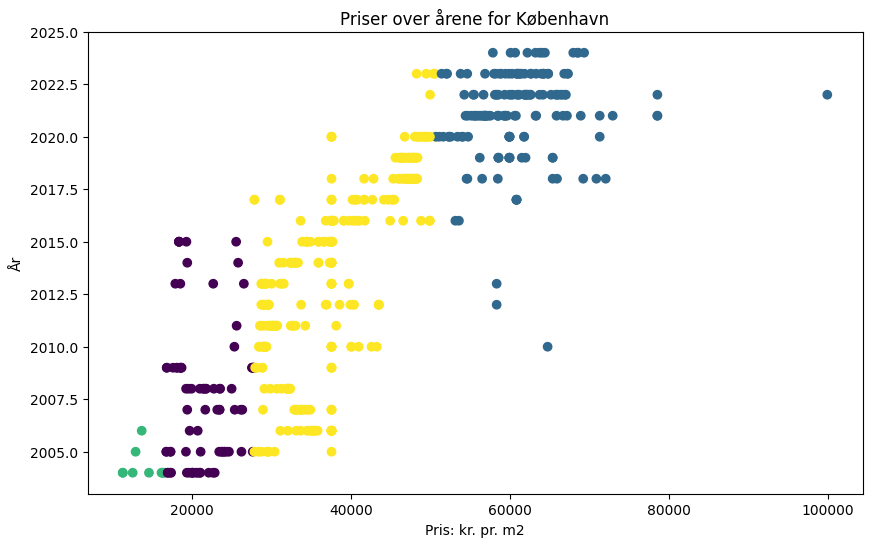

In [55]:
københavn_data = data[data['Kommune_København'] == 1]

københavn_labels = kmeans.labels_[data['Kommune_København'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(københavn_data['Pris'], københavn_data['År'], c=københavn_labels, cmap='viridis')
plt.xlabel('Pris: kr. pr. m2')
plt.ylabel('År')
plt.title('Priser over årene for København')
plt.show()

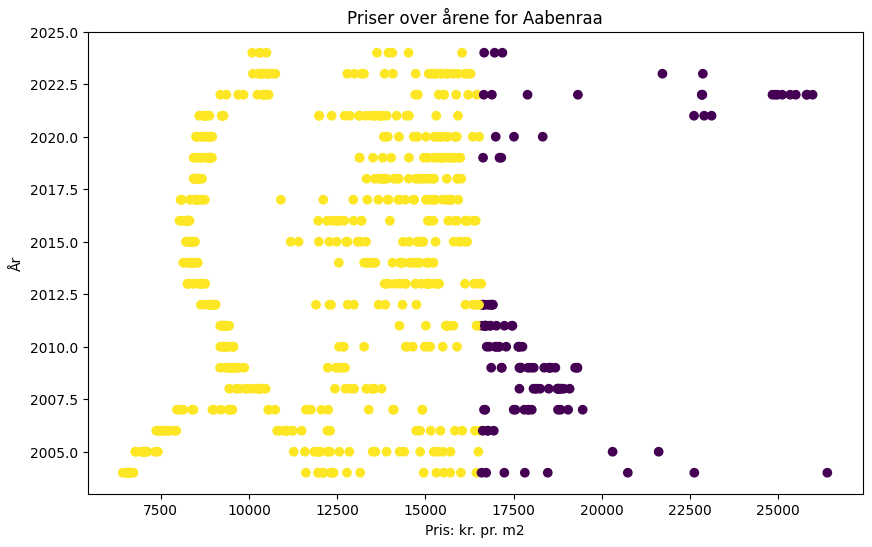

In [56]:
aabenraa_data = data[data['Kommune_Aabenraa'] == 1]

aabenraa_labels = kmeans.labels_[data['Kommune_Aabenraa'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(aabenraa_data['Pris'], aabenraa_data['År'], c=aabenraa_labels, cmap='viridis')
plt.xlabel('Pris: kr. pr. m2')
plt.ylabel('År')
plt.title('Priser over årene for Aabenraa')
plt.show()

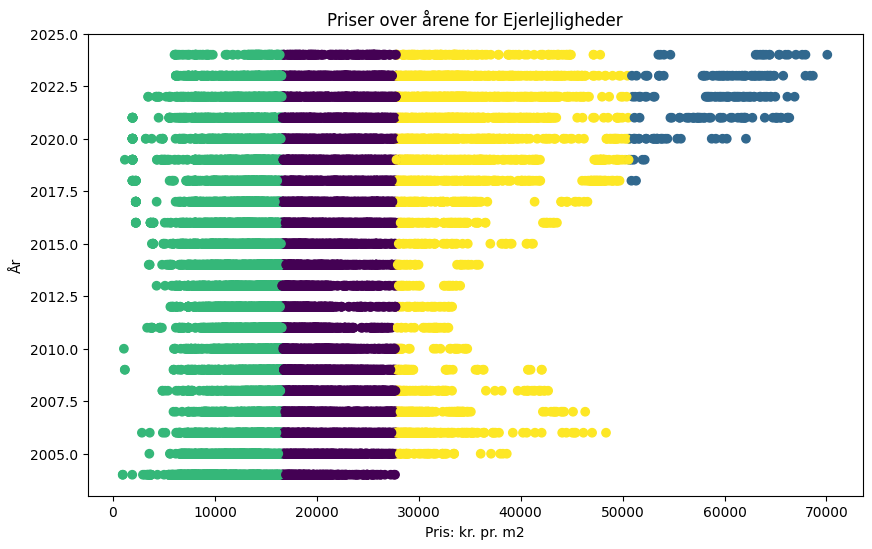

In [57]:
ejerlejlighed_data = data[data['Boligtype_Ejerlejlighed'] == 1]

ejerlejlighed_labels = kmeans.labels_[data['Boligtype_Ejerlejlighed'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(ejerlejlighed_data['Pris'], ejerlejlighed_data['År'], c=ejerlejlighed_labels, cmap='viridis')
plt.xlabel('Pris: kr. pr. m2')
plt.ylabel('År')
plt.title('Priser over årene for Ejerlejligheder')
plt.show()

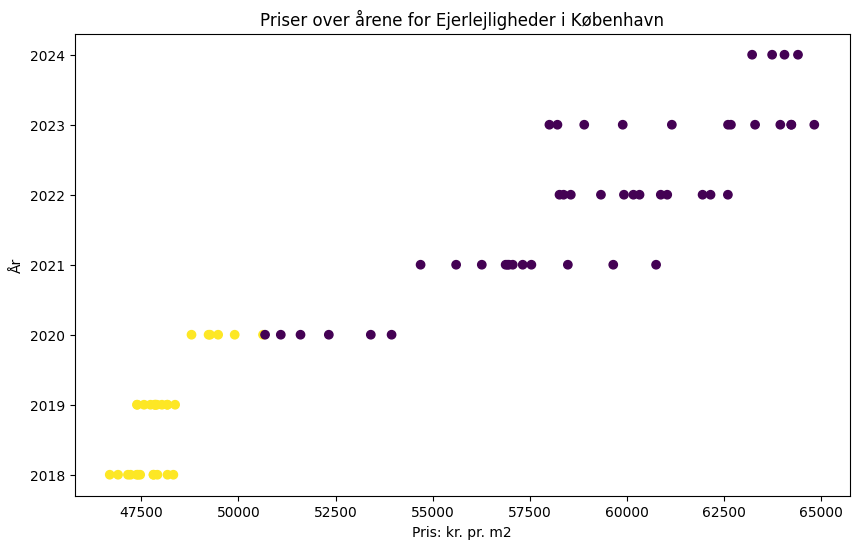

In [58]:
combined_data = data[(data['Boligtype_Ejerlejlighed'] == 1) & (data['Kommune_København'] == 1)]

combined_labels = kmeans.labels_[(data['Boligtype_Ejerlejlighed'] == 1) & (data['Kommune_København'] == 1)]

plt.figure(figsize=(10, 6))
plt.scatter(combined_data['Pris'], combined_data['År'], c=combined_labels, cmap='viridis')
plt.xlabel('Pris: kr. pr. m2')
plt.ylabel('År')
plt.title('Priser over årene for Ejerlejligheder i København')
plt.show()

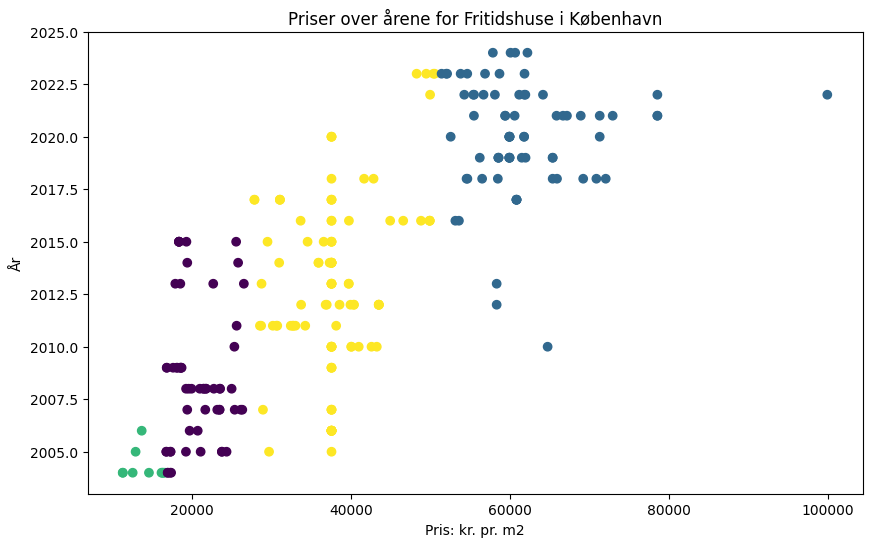

In [59]:
combined_data = data[(data['Boligtype_Fritidshus'] == 1) & (data['Kommune_København'] == 1)]

combined_labels = kmeans.labels_[(data['Boligtype_Fritidshus'] == 1) & (data['Kommune_København'] == 1)]

plt.figure(figsize=(10, 6))
plt.scatter(combined_data['Pris'], combined_data['År'], c=combined_labels, cmap='viridis')
plt.xlabel('Pris: kr. pr. m2')
plt.ylabel('År')
plt.title('Priser over årene for Fritidshuse i København')
plt.show()

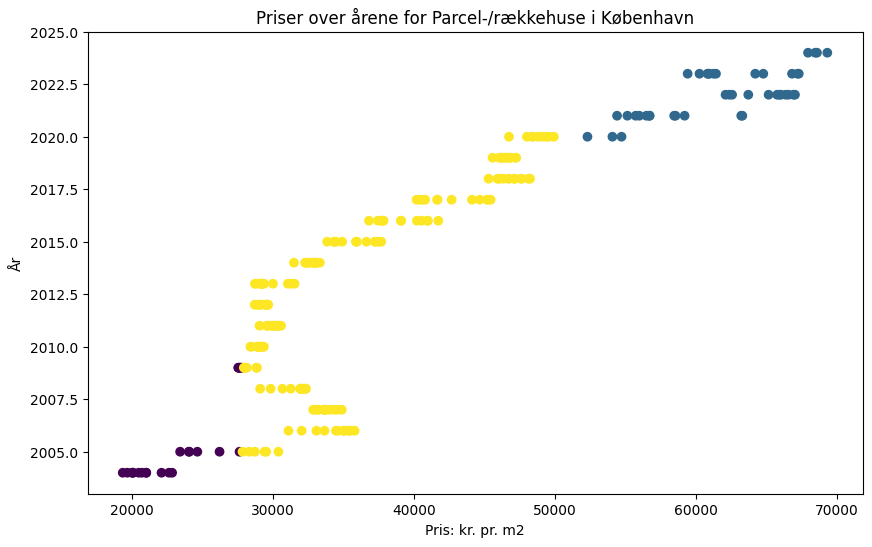

In [60]:
combined_data = data[(data['Boligtype_Parcel'] == 1) & (data['Kommune_København'] == 1)]

combined_labels = kmeans.labels_[(data['Boligtype_Parcel'] == 1) & (data['Kommune_København'] == 1)]

plt.figure(figsize=(10, 6))
plt.scatter(combined_data['Pris'], combined_data['År'], c=combined_labels, cmap='viridis')
plt.xlabel('Pris: kr. pr. m2')
plt.ylabel('År')
plt.title('Priser over årene for Parcel-/rækkehuse i København')
plt.show()